<a href="https://colab.research.google.com/github/Rezamiry/stat_1p50/blob/main/Face_Authentication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import clear_output

# download keras model and dataset
# !gdown 1-CqVU9Lhc66XiNQ2qPctgy3LtdbCV2v4
!gdown 1Zr1ydGNEAIFWNwCQ9cColpSAEme4ZMcd -O ./dataset --folder

# download necessary packages
!pip install facenet-pytorch
!pip install keras_facenet

clear_output()

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image
from facenet_pytorch import MTCNN
from sklearn.preprocessing import Normalizer
from keras_facenet import FaceNet

In [ ]:
tf.config.experimental.list_physical_devices('GPU')
# output: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')] if not change the runtime to gpu

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
# load pretrained model
facenet = FaceNet()
mtcnn = MTCNN(post_process=False, device="cuda:0")
normalizer = Normalizer(norm='l2')

In [ ]:
def get_face(image_path, required_size=(160,160)):

  """
    Implement face detection.

    Arguments:
        image_path -- path to an image

    Returns:
        face -- cropped face in image, None if there is not face in image'

    face_detector.detect
      input: Image object
      output: bounding boxes, probabilities

  """

  ### Your code starts here


  # open image with Image.open and store in image variable

  # convert image to RGB

  # detect face in image and store bounding boxes in bbox


  #### Your code ends here
  if bbox is None:
    return None
  bbox = bbox[0]
  face = image.crop(bbox)
  face = face.resize(required_size)
  return np.array(face)[None,:]

In [ ]:
!ls

dataset  facenet_keras.h5  sample_data


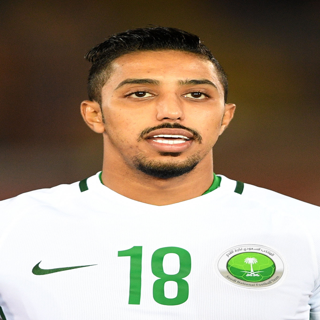

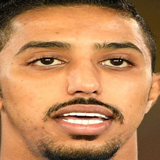

In [ ]:
# test your code
face_temp = get_face("./dataset/train/aldawsari.jpg")
assert (face_temp[0][0][0:2] == np.array([[11,10,7], [9,8,6]])).all()
original_image = Image.open("./dataset/train/aldawsari.jpg").resize((320,320))
croped_image =  Image.fromarray(face_temp[0])
display(original_image)
display(croped_image)

In [ ]:
def get_embedding(face):
  """
    Implement embedding function.

    Arguments:
        face -- numpy array, output of get_face function

    Returns:
        embedding -- 128 embeding of input face

    facenet.predict
      input: numpy array of face
      output: embedding
  """
  face_pixel = face.astype('float32')

  ### Your code start here

  # get the embedding using facenet.embeddings

  ### Your code ends here
  normalized_embedding = normalizer.transform(embedding.reshape((1, -1)))
  return normalized_embedding

In [ ]:
# test your code
face_temp = get_face("./dataset/train/muller.jpg")
embed_temp = get_embedding(face_temp)
assert np.allclose(embed_temp[0][:10], np.array([ 0.01040815,  0.01323744, -0.0813616 ,  0.03703693, -0.00583528,
        0.09873081, -0.02493106,  0.06667081, -0.03646993, -0.02634571]))
print("Your get_embedding function worked!")


1/1 [==============================] - 0s 36ms/step
Your get_embedding function worked!


In [ ]:
def calculate_distance(embed_1, embed_2):
  """
    Implement calculate_distance function

    Arguments:
        embed_1 -- embedding 1
        embed_2 -- embedding 2

    Returns:
        distance -- second norm of distane of inputs

  """
  ### Your code start here
  # calculate second norm of distance of inputs and store it in distance variable, use linalg.norm of numpy package

  ### Your code ends here
  return distance

In [ ]:
# Test your code here
f1 = get_face("./dataset/train/aldawsari.jpg")
f2 = get_face("./dataset/test/aldawsari_test.jpg")
em1 = get_embedding(f1)
em2 = get_embedding(f2)
dist = calculate_distance(em1, em2)
assert np.isclose(dist, 0.65549076)
print("Your code has worked!")

1/1 [==============================] - 0s 26ms/step
Your code has worked!


In [ ]:
# creating a dictionary with names and embeddings of all players - except test images and picture1, picture2
dataset = {}
dataset['kane'] = get_embedding(get_face("./dataset/train/kane.jpg"))
### Your code starts here



### Your code ends here

In [ ]:
def face_verification(image_path, identity):
  """
    Implement face verification.

    Arguments:
        image_path -- path to image

    Returns:
        verified -- True or False

  """
  ### Your code start here



  ### Your code ends here
  return verified

In [ ]:
assert face_verification("./dataset/train/messi.jpg", "messi")
assert !face_verification("./dataset/train/ronaldo.jpg", "messi")

1/1 [==============================] - 0s 27ms/step


False

In [ ]:
def face_recognition(image_path):
  """
    Implement face verification.

    Arguments:
        image_path -- path to image

    Returns:
        identity -- name of recognizied person or "unknown"

  """
  ### Your code start here



  ### Your code ends here
  return identity